In [12]:
install.packages('maps')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [54]:
install.packages('openintro')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [55]:
library(tidyverse)
library(maps)
library(openintro)

Please visit openintro.org for free statistics materials

Attaching package: ‘openintro’

The following object is masked from ‘package:ggplot2’:

    diamonds

The following objects are masked from ‘package:datasets’:

    cars, trees



### Load mapping data to produce state maps and add column that contains the state abbreviations.

In [40]:
us_states <- map_data("state")

In [58]:
us_states['State'] <- state2abbr(us_states$region)

### Load the data file containing the attributes of the plans

In [6]:
planData <- read_csv('/data/PDSI/PlanAttributes.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  AVCalculatorOutputNumber = col_double(),
  BeginPrimaryCareCostSharingAfterNumberOfVisits = col_double(),
  BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays = col_double(),
  BenefitPackageId = col_double(),
  BusinessYear = col_double(),
  ChildOnlyPlanId = col_logical(),
  CompositeRatingOffered = col_logical(),
  DEHBCombInnOonFamilyMOOP = col_logical(),
  DEHBCombInnOonFamilyPerGroupMOOP = col_logical(),
  DEHBCombInnOonFamilyPerPersonMOOP = col_logical(),
  DEHBCombInnOonIndividualMOOP = col_logical(),
  DEHBDedCombInnOonFamilyPerGroup = col_logical(),
  DEHBDedCombInnOonFamilyPerPerson = col_logical(),
  DEHBDedInnTier1FamilyPerGroup = col_logical(),
  DEHBDedInnTier1FamilyPerPerson = col_logical(),
  DEHBDedInnTier2FamilyPerGroup = col_logical(),
  DEHBDedInnTier2FamilyPerPerson = col_logical(),
  DEHBDedOutOfNetFamilyPerGroup = col_logical(),
  DEHBDedOutOfNetFamilyPerPerson = col_logical(),
  DEHBI

### Pull out the top plan for ea

In [70]:
topPlan <- planData %>%
count(StateCode, PlanMarketingName, sort = TRUE) %>%
group_by(StateCode) %>%
slice(which.max(table(PlanMarketingName)))

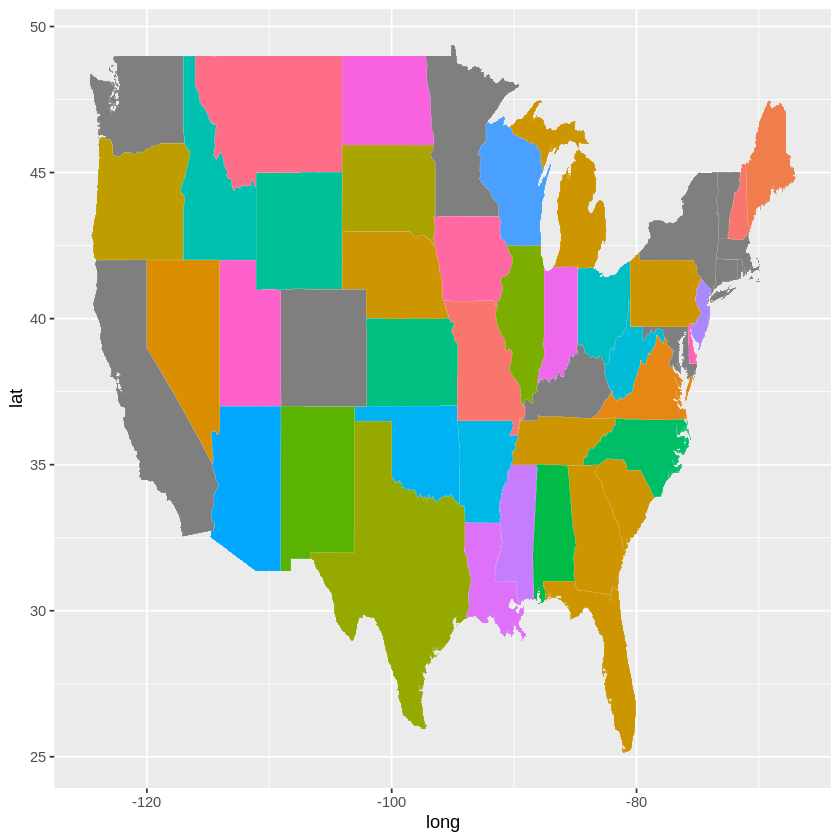

In [72]:
full_join(us_states, topPlan, by = c('State' = 'StateCode')) %>%
ggplot(aes(x = long, y = lat, group = group, fill = PlanMarketingName)) +
geom_polygon(color='gray90', size=0.05)+
guides(fill = FALSE)